# **Lanzhou University Of Tehcnology**
[LUT website](https://www.lut.edu.cn/)

![texto alternativo](![](https://https://statnano.com/resource/amar_university_world/files/images/21/1/thumbnail_5e805feba49b7b25e489d511fe246791.jpg))

# **Improving** the fast prediction of the quasi phase equilibrum in phase field model for multicomponet alloys. 

We aim to improve the phase field model for multicomponent alloys introduced by **Xue Jiang** et al., In the published pair they provide the data used to obtain their results, therefor we are using the same data set in order to have evidence that our Neural Network Model (NN) for the fast prediction of the quasi phase equilibrium. We propose a robust NN which incorporates several layers including convolutional and pulling layers in the case they are implemnted. 

As a forst step, we are going to load the data as following: 

In [2]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Data1kTesting.csv to Data1kTesting.csv
User uploaded file "Data1kTesting.csv" with length 108027 bytes


In [0]:
from numpy import genfromtxt
my_training_data = genfromtxt('Data100kTraining.csv', delimiter=',')
my_test_data = genfromtxt('Data1kTesting.csv', delimiter=',')
training_inputdata = my_training_data[1:,0:3]
training_outputdata = my_training_data[1:,3]
test_inputdata = my_test_data[1:,0:3]
test_outputdata = my_test_data[1:,3]

In [130]:

print (training_outputdata)

[0.03423592 0.03418403 0.01220378 ... 0.05632001 0.07137153 0.00564966]


In [160]:
import numpy as np
from numpy import  newaxis

training_input = training_inputdata[:,:,newaxis]
training_output = training_outputdata.reshape(99900,1)
test_input = test_inputdata[:,:,newaxis]
test_output = test_outputdata.reshape(1000,1)
print (training_input.shape)
print (training_output.shape)
print (test_input.shape)
print (test_output.shape)

(99900, 3, 1)
(99900, 1)
(1000, 3, 1)
(1000, 1)



Let's start with our import of TensorFlow

In [7]:
import tensorflow as tf
print(tf.__version__)

1.15.0


Notice that all of the values in the number are already between 0 and 1. If we are training a neural network, for various reasons it's easier if we treat all values in this range, a process called **normalization**'...and fortunately in Python it's easy to normalize a list like this without looping. 

Let's now design the model. There's quite a few new concepts here, but don't worry, you'll get the hang of them. 
In our design we will be playing with the number of layers and the number of newrons that will have each one, however the inicial values will be taking from a teoretical analisys that will be shown in a separe file in the GitHub directory.

Remenber,  the following model has as input: cMg cCu y Fhi; and as outputs: Mgl, Mgs, Cul, Cus. It was designed to predict one of the output Mgl

In [0]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(16, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(1, activation=tf.nn.tanh)])

The next thing to do, now the model is defined, is to actually build it. You do this by compiling it with an optimizer and loss function as before -- and then you train it by calling **model.fit ** asking it to fit your training data to your training labels -- i.e. have it figure out the relationship between the training data and its actual labels, so in future if you have data that looks like the training data, then it can make a prediction for what that data would look like. 

**Stochastic Gradien Descent**

In [214]:
test_output = test_output.reshape(1000,1)
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False, name='SGD'),
              loss = 'mean_squared_error',
              metrics=['accuracy'])

history = model.fit(training_input, training_output, validation_data=(test_input, test_output), batch_size=16, epochs=10) #batch_size=4096,


Train on 99900 samples, validate on 1000 samples
Epoch 1/10
99900/99900 [==============================] - 10s 96us/sample - loss: 4.1339e-04 - acc: 0.0000e+00 - val_loss: 2.8820e-04 - val_acc: 0.0000e+00
Epoch 2/10
99900/99900 [==============================] - 9s 89us/sample - loss: 2.6802e-04 - acc: 0.0000e+00 - val_loss: 2.5216e-04 - val_acc: 0.0000e+00
Epoch 3/10
99900/99900 [==============================] - 9s 90us/sample - loss: 2.4761e-04 - acc: 0.0000e+00 - val_loss: 2.4848e-04 - val_acc: 0.0000e+00
Epoch 4/10
99900/99900 [==============================] - 9s 91us/sample - loss: 2.4336e-04 - acc: 0.0000e+00 - val_loss: 2.4469e-04 - val_acc: 0.0000e+00
Epoch 5/10
99900/99900 [==============================] - 9s 93us/sample - loss: 2.4110e-04 - acc: 0.0000e+00 - val_loss: 2.4340e-04 - val_acc: 0.0000e+00
Epoch 6/10
99900/99900 [==============================] - 9s 90us/sample - loss: 2.3957e-04 - acc: 0.0000e+00 - val_loss: 2.4269e-04 - val_acc: 0.0000e+00
Epoch 7/10
99900/999

Following is shown the prediction of the model:


In [215]:
#model.evaluate(test_input, test_output)
classifications = model.predict(test_input)
classifications = classifications.reshape(1,1000)
test_output = test_output.reshape(1,1000)
print("First element prediction:", + classifications[0, 0:5] )
print("First element real value:", test_output[0, 0:5])

First element prediction: [0.04762461 0.03922815 0.11180709 0.10688281 0.07096075]
First element real value: [0.05552293 0.02777021 0.06883758 0.07498071 0.08858769]


Next, is presented the raph of the obtained results

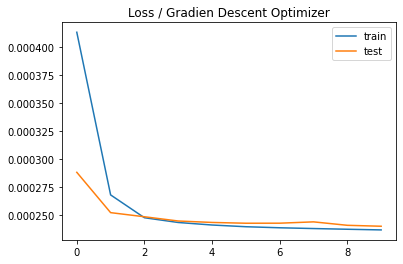

In [216]:
from matplotlib import pyplot
pyplot.title('Loss / Gradien Descent Optimizer')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

Following, is the implementation of the same model, but this time is run using an Adam Optimizer instead of Stochastic Gradient Descent, this model also predicts just one of the four expected outputs.

**Adam Optimizer**

In [229]:
test_output = test_output.reshape(1000,1)
model.compile(optimizer = tf.train.AdamOptimizer(),
              loss = 'mean_squared_error',
              metrics=['accuracy'])

history = model.fit(training_input, training_output, validation_data=(test_input, test_output),batch_size=64, epochs=20)
#model.evaluate(test_input, test_output)
classifications = model.predict(test_input)

print("First element prediction:", + classifications[0, 0:5] )
print("First element real value:", test_output[0, 0:5])

Train on 99900 samples, validate on 1000 samples
Epoch 1/20
99900/99900 [==============================] - 5s 51us/sample - loss: 2.5189e-04 - acc: 0.0000e+00 - val_loss: 2.4096e-04 - val_acc: 0.0000e+00
Epoch 2/20
99900/99900 [==============================] - 4s 39us/sample - loss: 2.3464e-04 - acc: 0.0000e+00 - val_loss: 2.4385e-04 - val_acc: 0.0000e+00
Epoch 3/20
99900/99900 [==============================] - 4s 39us/sample - loss: 2.3372e-04 - acc: 0.0000e+00 - val_loss: 2.2903e-04 - val_acc: 0.0000e+00
Epoch 4/20
99900/99900 [==============================] - 4s 39us/sample - loss: 2.3290e-04 - acc: 0.0000e+00 - val_loss: 2.3344e-04 - val_acc: 0.0000e+00
Epoch 5/20
99900/99900 [==============================] - 4s 39us/sample - loss: 2.3177e-04 - acc: 0.0000e+00 - val_loss: 2.3321e-04 - val_acc: 0.0000e+00
Epoch 6/20
99900/99900 [==============================] - 4s 39us/sample - loss: 2.3170e-04 - acc: 0.0000e+00 - val_loss: 2.3211e-04 - val_acc: 0.0000e+00
Epoch 7/20
99900/9990

Following the graph of the values obtained:

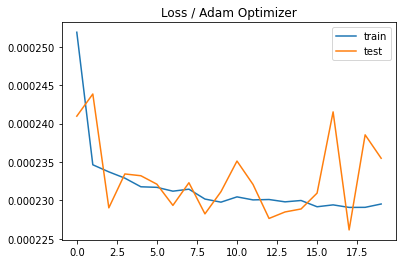

In [230]:
from matplotlib import pyplot
pyplot.title('Loss / Adam Optimizer')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

Finally, is presented a summary of the architecture implemented of the model.

In [231]:
print(model.summary())

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_29 (Flatten)         multiple                  0         
_________________________________________________________________
dense_99 (Dense)             multiple                  64        
_________________________________________________________________
dense_100 (Dense)            multiple                  1088      
_________________________________________________________________
dense_101 (Dense)            multiple                  8320      
_________________________________________________________________
dense_102 (Dense)            multiple                  129       
Total params: 9,601
Trainable params: 9,601
Non-trainable params: 0
_________________________________________________________________
None
